In [1]:
!pip install shap
!pip install pycaret[full]
!pip install pyyaml==5.4.1

     |████████████████████████████████| 564 kB 5.2 MB/s 
     |████████████████████████████████| 288 kB 5.3 MB/s 
     |████████████████████████████████| 1.7 MB 51.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 113 kB 56.2 MB/s 
     |████████████████████████████████| 2.0 MB 42.1 MB/s 
     |████████████████████████████████| 6.8 MB 37.8 MB/s 
     |████████████████████████████████| 1.3 MB 44.5 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
     |████████████████████████████████| 15.5 MB 31.3 MB/s 
     |████████████████████████████████| 261 kB 56.4 MB/s 
     |████████████████████████████████| 167 kB 58.4 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 100 kB 9.7 MB/s 
     |████████████████████████████████| 76.3 MB 52 kB/s 
     |████████████████████

     |████████████████████████████████| 636 kB 5.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [2]:
import pandas as pd

from pycaret.clustering import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
df = pd.read_csv('wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
print("Number of duplicated rows are: ",df.duplicated().sum())

Number of duplicated rows are:  0


In [5]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)

In [8]:
clustering = setup(data=train,
                   normalize = True,
                   session_id = 365)

# ignore_features = []

,Description,Value
0,session_id,365
1,Original Data,"(124, 13)"
2,Missing Values,False
3,Numeric Features,13
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(124, 13)"
9,CPU Jobs,-1


In [9]:
kmeans = create_model("kmeans")

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2575,39.7392,1.7492,0,0,0


In [10]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=365, tol=0.0001, verbose=0)


In [12]:
kmodes = create_model("kmodes", num_clusters=6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1289,0.9972,7.6244,0,0,0


In [13]:
print(kmodes)

KModes(cat_dissim=<function matching_dissim at 0x7f5210c13560>, init='Cao',
       max_iter=100, n_clusters=6, n_init=1, n_jobs=-1, random_state=365,
       verbose=0)


In [14]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [15]:
kmeans_result = assign_model(kmeans)

In [16]:
kmeans_result.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
138,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580,Cluster 3
104,12.51,1.73,1.98,20.5,85,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672,Cluster 0
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750,Cluster 2
36,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880,Cluster 1
93,12.29,2.83,2.22,18.0,88,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290,Cluster 2


In [17]:
plot_model(kmeans)

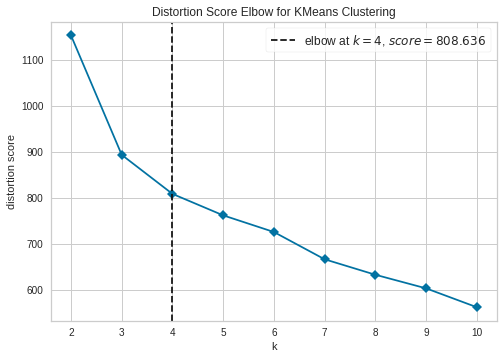

In [18]:
plot_model(kmeans, plot = "elbow")

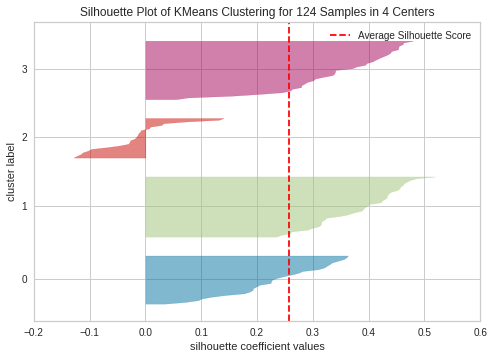

In [19]:
plot_model(kmeans, plot = "silhouette") # how each object has been classified

In [20]:
plot_model(kmeans, plot="distribution") #size of each cluster

In [22]:
plot_model(kmeans, plot="distribution", feature = "Alcohol")

In [23]:
test_pred = predict_model(kmeans, data = test)

In [24]:
test_pred.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,Cluster 1
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,Cluster 1
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600,Cluster 3
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,Cluster 1
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,Cluster 0


In [25]:
save_model(kmeans, "kmeans_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  KMe

In [26]:
saved_kmeans = load_model("kmeans_model")

Transformation Pipeline and Model Successfully Loaded


In [27]:
new_pred = predict_model(saved_kmeans, data=test)

In [28]:
new_pred.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,Cluster 1
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,Cluster 1
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600,Cluster 3
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,Cluster 1
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,Cluster 0
